# Capstone Project 1: Random Forest Evaluation

In [7]:
# Import libraries:
import pandas as pd #for building pandas dataframes for analysis
import numpy as np #fundamental package for scientific computing with Python

# Plotting/Visualizations:
import seaborn as sns #for neat visualizations
import matplotlib.pyplot as plt #for visualizations
import datetime
import pylab as P

# Classical Stats Modeling:
import statsmodels.api as sm #provides estimation of many different statistical models, tests and data exploration 
import scipy.stats as stats #large number of probability distributions and statistical functions

# Supervised Learning:
from sklearn.model_selection import train_test_split #for performing train test split analysis
from sklearn.linear_model import LinearRegression #for performing linear regression
from sklearn.metrics import r2_score # Calculte R^2
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [8]:
#Cleaned Data w/o Accommodates
filtered_result4 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/AirBNB_cleaned_dataChicagoprice_filtered_result_4_2018-07-20.csv')
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
0,3.0,2.0,5.0,98.0,186,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,4.5,296.0,46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3.0,5.0,108.0,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,4.5,217.0,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,4.5,433.0,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
filtered_result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90355 entries, 0 to 90354
Columns: 197 entries, bedrooms to neighborhood_Wrigleyville
dtypes: float64(4), int64(193)
memory usage: 135.8 MB


In [10]:
filtered_result4.describe()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,...,90355.00000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000
mean,1.284655,1.601561,4.763306,113.129910,27.231111,0.569465,0.394677,0.035859,0.011455,0.005423,...,0.00010,0.009673,0.037917,0.001760,0.024758,0.000022,0.004814,0.000166,0.009640,0.011278
std,0.750933,5.301876,0.348055,75.677914,35.624350,0.495154,0.488784,0.185938,0.106413,0.073442,...,0.00998,0.097875,0.190997,0.041912,0.155387,0.004705,0.069219,0.012884,0.097708,0.105597
min,0.000000,1.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.500000,63.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,95.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,5.000000,140.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,365.000000,5.000000,500.000000,427.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
def percent_within_x(y_pred_test, y_test, x):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    tmp = []
    for num in err_arr:
        if np.abs(num) < x:
            tmp.append(num)
    return 100.*(len(tmp)/float(len(err_arr)))

def median_error(y_pred_test, y_test):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    return np.median(np.abs(err_arr))

def print_percents(y_pred_test, y_true):
    print ('Percent within 5 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 5)))
    print ('Percent within 10 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 10)))
    print ('Percent within 20 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 20)))
    print('')
    print ('Median error (percent): %0.3f' %(median_error(y_pred_test, y_true)))
    print('')

## Random Forest

Train Set:
Random Forest R squared Train: 0.8389
Random Forest RMSE Train: 30.2501
Random Forest MAE Train Set: 16.6634
Test Set:
Random Forest R squared Test Set: 0.6915
Random Forest RMSE Test Set: 42.7325
Random Forest MAE Test Set: 24.9945
Percents
Percent within 5 of price: 26.927
Percent within 10 of price: 40.092
Percent within 20 of price: 59.310

Median error (percent): 14.473

None


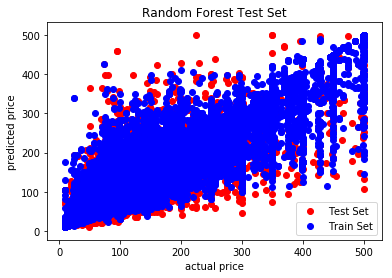

In [13]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)

#Price Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)
regr_forest = RandomForestRegressor()

#Fitting Random Forest using Sklearn
regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)


print('Train Set:')

print('Random Forest R squared Train: %.4f' % regr_forest.score(X_train, y_train))

forest_mse = mean_squared_error(y_train, y_pred_train)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Train: %.4f' % forest_rmse)

lin_mae = mean_absolute_error(y_train, y_pred_train)
print('Random Forest MAE Train Set: %.4f' % lin_mae)

r2_score(y_test, y_pred_test)

print('Test Set:')

print('Random Forest R squared Test Set: %.4f' % regr_forest.score(X_test, y_test))

forest_mse = mean_squared_error(y_test, y_pred_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE Test Set: %.4f' % forest_rmse)

lin_mae = mean_absolute_error(y_test, y_pred_test)
print('Random Forest MAE Test Set: %.4f' % lin_mae)

print('Percents')
print(print_percents(y_test, y_pred_test))

plt.scatter(x=y_test, y=y_pred_test, color='red', label="Test Set")
plt.scatter(x=y_train, y=y_pred_train, color= 'blue', label="Train Set")
plt.legend()
plt.title('Random Forest Test Set')
plt.ylabel('predicted price')
plt.xlabel('actual price')
plt.show()

#### Feature Importance Analysis:

In [14]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

#Fitting Random Forest using Sklearn
regr_forest.fit(X_train, y_train)
y_pred_test = regr_forest.predict(X_test)
y_pred_train = regr_forest.predict(X_train)

In [15]:
importances = pd.DataFrame({'feature':names,'importance':np.round(regr_forest.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

                                     importance
feature                                        
room_type_Entire home/apt                0.3329
reviews                                  0.1952
bedrooms                                 0.1391
minstay                                  0.0468
overall_satisfaction                     0.0357
neighborhood_Near North                  0.0179
neighborhood_The Loop                    0.0116
neighborhood_Gold Coast                  0.0100
neighborhood_River North                 0.0095
neighborhood_South Loop                  0.0091
neighborhood_Near East Side              0.0088
neighborhood_Old Town                    0.0087
neighborhood_Lake View East              0.0068
neighborhood_Lake View                   0.0061
neighborhood_Logan Square                0.0055
neighborhood_Old Town Triangle           0.0054
neighborhood_Lincoln Park                0.0052
neighborhood_Roscoe Village              0.0052
neighborhood_Humboldt Park              

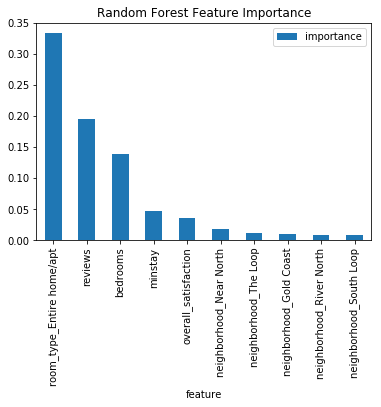

In [16]:
(importances[0:10]).plot.bar()
plt.title('Random Forest Feature Importance')
plt.show()

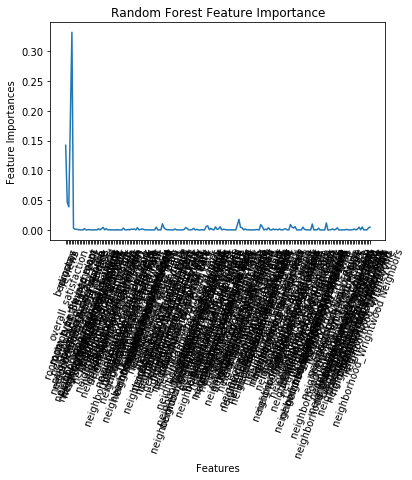

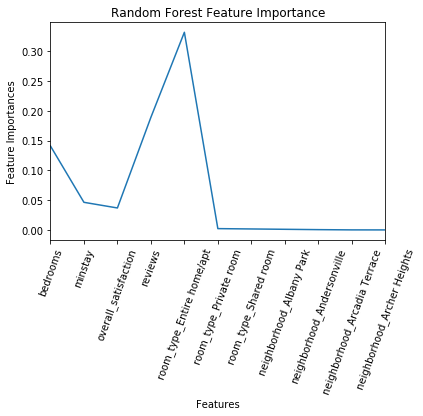

In [18]:
###Feature Importance Mapping:

names = filtered_result4.drop('price', axis = 1).columns

rfr = RandomForestRegressor()
rfr_feature_importances_ = rfr.fit(X,Y).feature_importances_
_ = plt.plot(range(len(names)),rfr_feature_importances_)
_ = plt.xticks(range(len(names)),names,rotation=70)
_ = plt.ylabel('Feature Importances')
_ = plt.xlabel('Features')
_ = plt.title('Random Forest Feature Importance')
_ = plt.show()

rfr = RandomForestRegressor()
rfr_feature_importances_ = rfr.fit(X,Y).feature_importances_
_ = plt.plot(range(len(names)),rfr_feature_importances_)
_ = plt.xticks(range(len(names)),names,rotation=70)
_ = plt.ylabel('Feature Importances')
_ = plt.xlabel('Features')
_ = plt.title('Random Forest Feature Importance')
_ = plt.xlim(0, 10)
_ = plt.show()

#### Residual Analysis

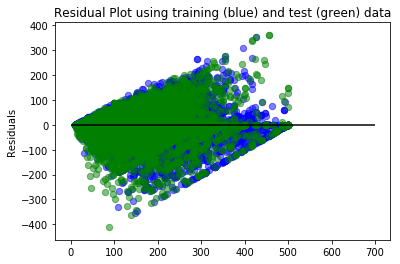

In [19]:
plt.scatter(regr_forest.predict(X_train), regr_forest.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(regr_forest.predict(X_test), regr_forest.predict(X_test)-y_test, c='g', s=40, alpha=0.5)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.hlines(y=0, xmin=0, xmax=700)
plt.ylabel('Residuals')
plt.show()

In [20]:
residual_error= y_pred_test-y_test
error_mean = np.mean(residual_error)
error_sigma = np.std(residual_error)

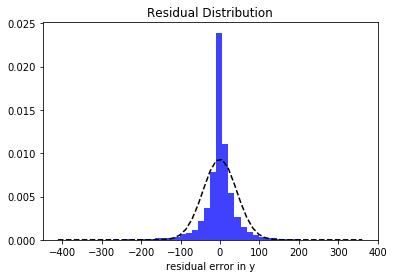

In [26]:
n, bins, patches = plt.hist(residual_error, 50, normed=1, facecolor='blue', alpha=0.75)
y_pdf = P.normpdf( bins, error_mean, error_sigma)
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.xlabel("residual error in y")
plt.title("Residual Distribution")
plt.show()

In [22]:
def percent_within_x(y_pred_test, y_test, x):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    tmp = []
    for num in err_arr:
        if np.abs(num) < x:
            tmp.append(num)
    return 100.*(len(tmp)/float(len(err_arr)))

def median_error(y_pred_test, y_test):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    return np.median(np.abs(err_arr))

def print_percents(y_pred_test, y_true):
    print ('Percent within 5 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 5)))
    print ('Percent within 10 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 10)))
    print ('Percent within 20 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 20)))
    print('')
    print ('Median error (percent): %0.3f' %(median_error(y_pred_test, y_true)))
    print('')

In [23]:
print(print_percents(y_pred_test, y_test))

Percent within 5 of price: 26.938
Percent within 10 of price: 40.535
Percent within 20 of price: 59.521

Median error (percent): 14.545

None


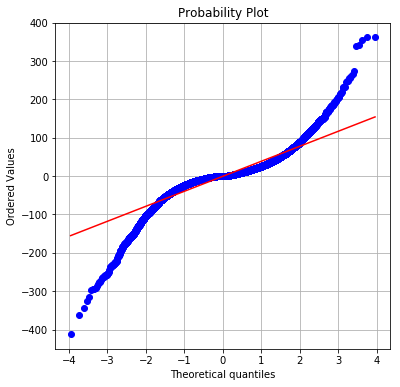

In [24]:
from scipy.stats import probplot
residual_error= y_pred_test-y_test
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
_ = probplot((residual_error), plot=ax)

plt.grid(True)
plt.show()

In [25]:
fits = y_pred_test
resids = residual_error
highresids = residual_error > 200  # outliers from quantile plot
lowresids = residual_error <-100
X_test[highresids]

,bedrooms,minstay,overall_satisfaction,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Arcadia Terrace,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
80194,3.0,1.0,5.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13179,2.0,3.0,5.0,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83464,5.0,1.0,5.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,1.0,1.0,5.0,202,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37686,4.0,1.0,5.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88072,4.0,1.0,4.0,15,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
87664,2.0,1.0,5.0,26,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55246,3.0,1.0,5.0,36,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26792,1.0,1.0,4.5,19,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39822,2.0,1.0,5.0,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test[lowresids]